# Import Libraries

In [1]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
mit_test_data = pd.read_csv('mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('mitbih_train.csv', header=None)

In [3]:
mit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [4]:
mit_train_data.shape

(87554, 188)

# PLOT HISTOGRAM 

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

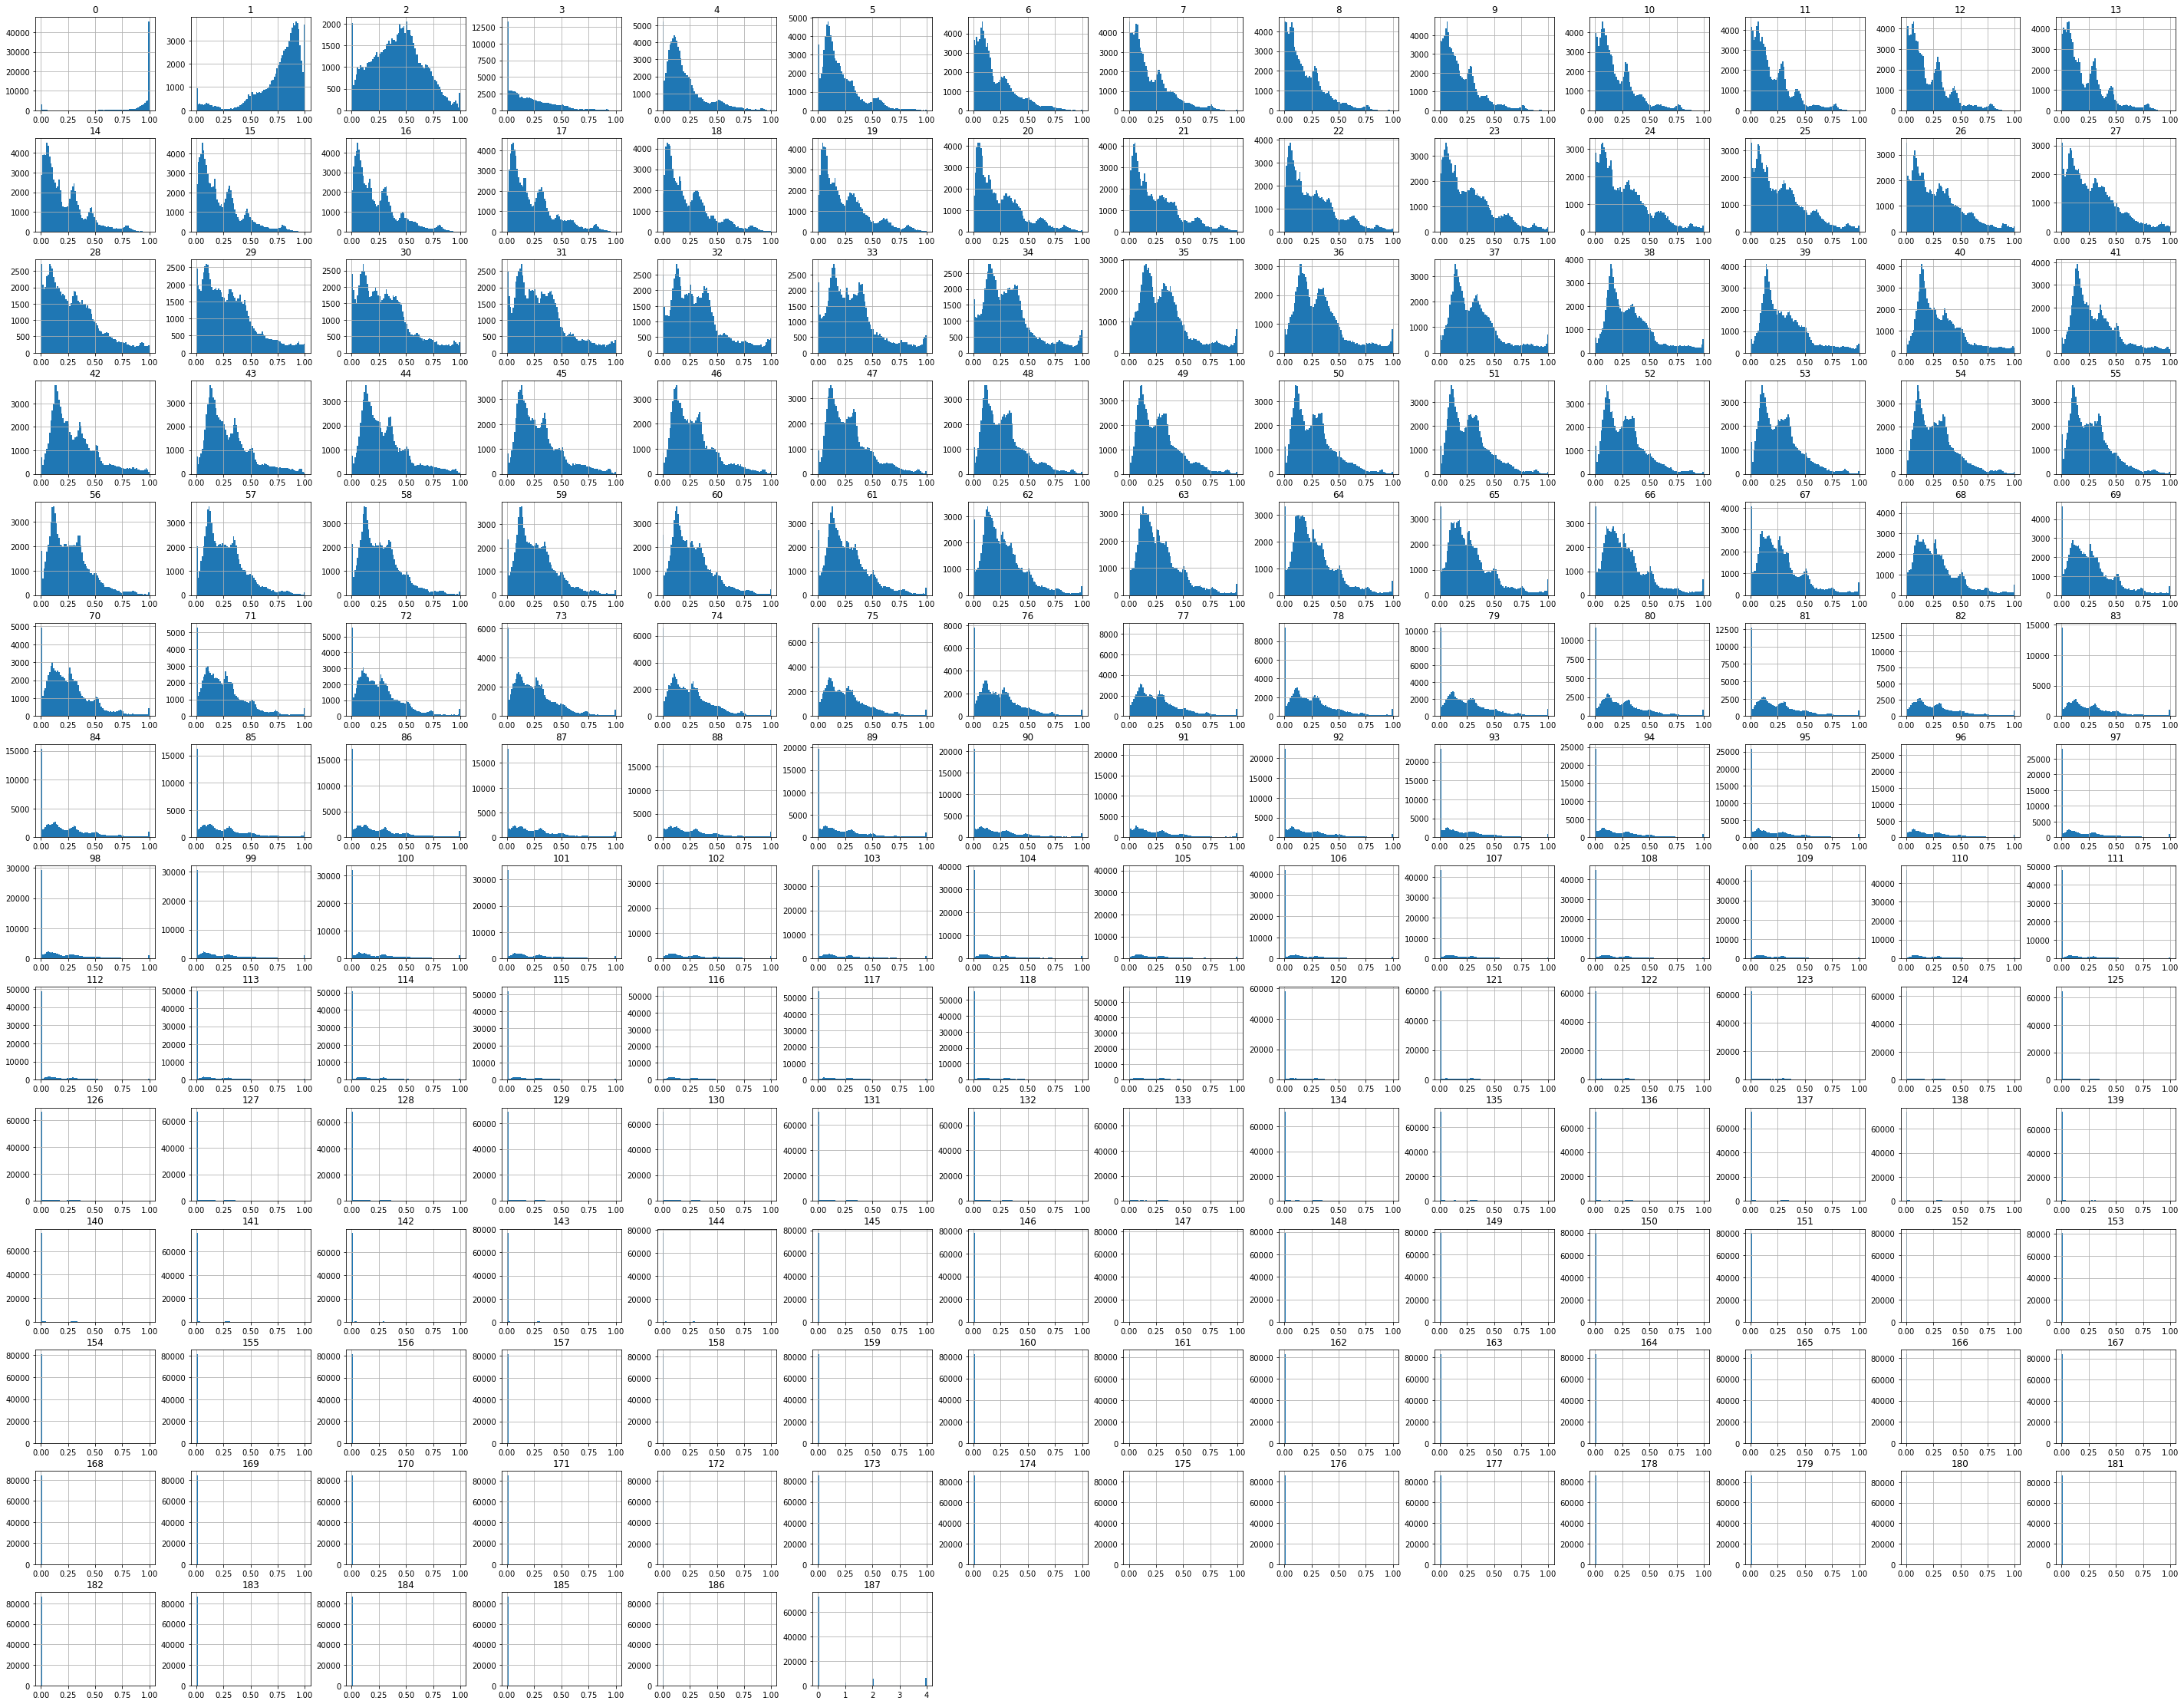

In [5]:
mit_train_data.hist(bins = 80,figsize =(50,40))

In [6]:
mit_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [7]:
mit_test_data.shape

(21892, 188)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

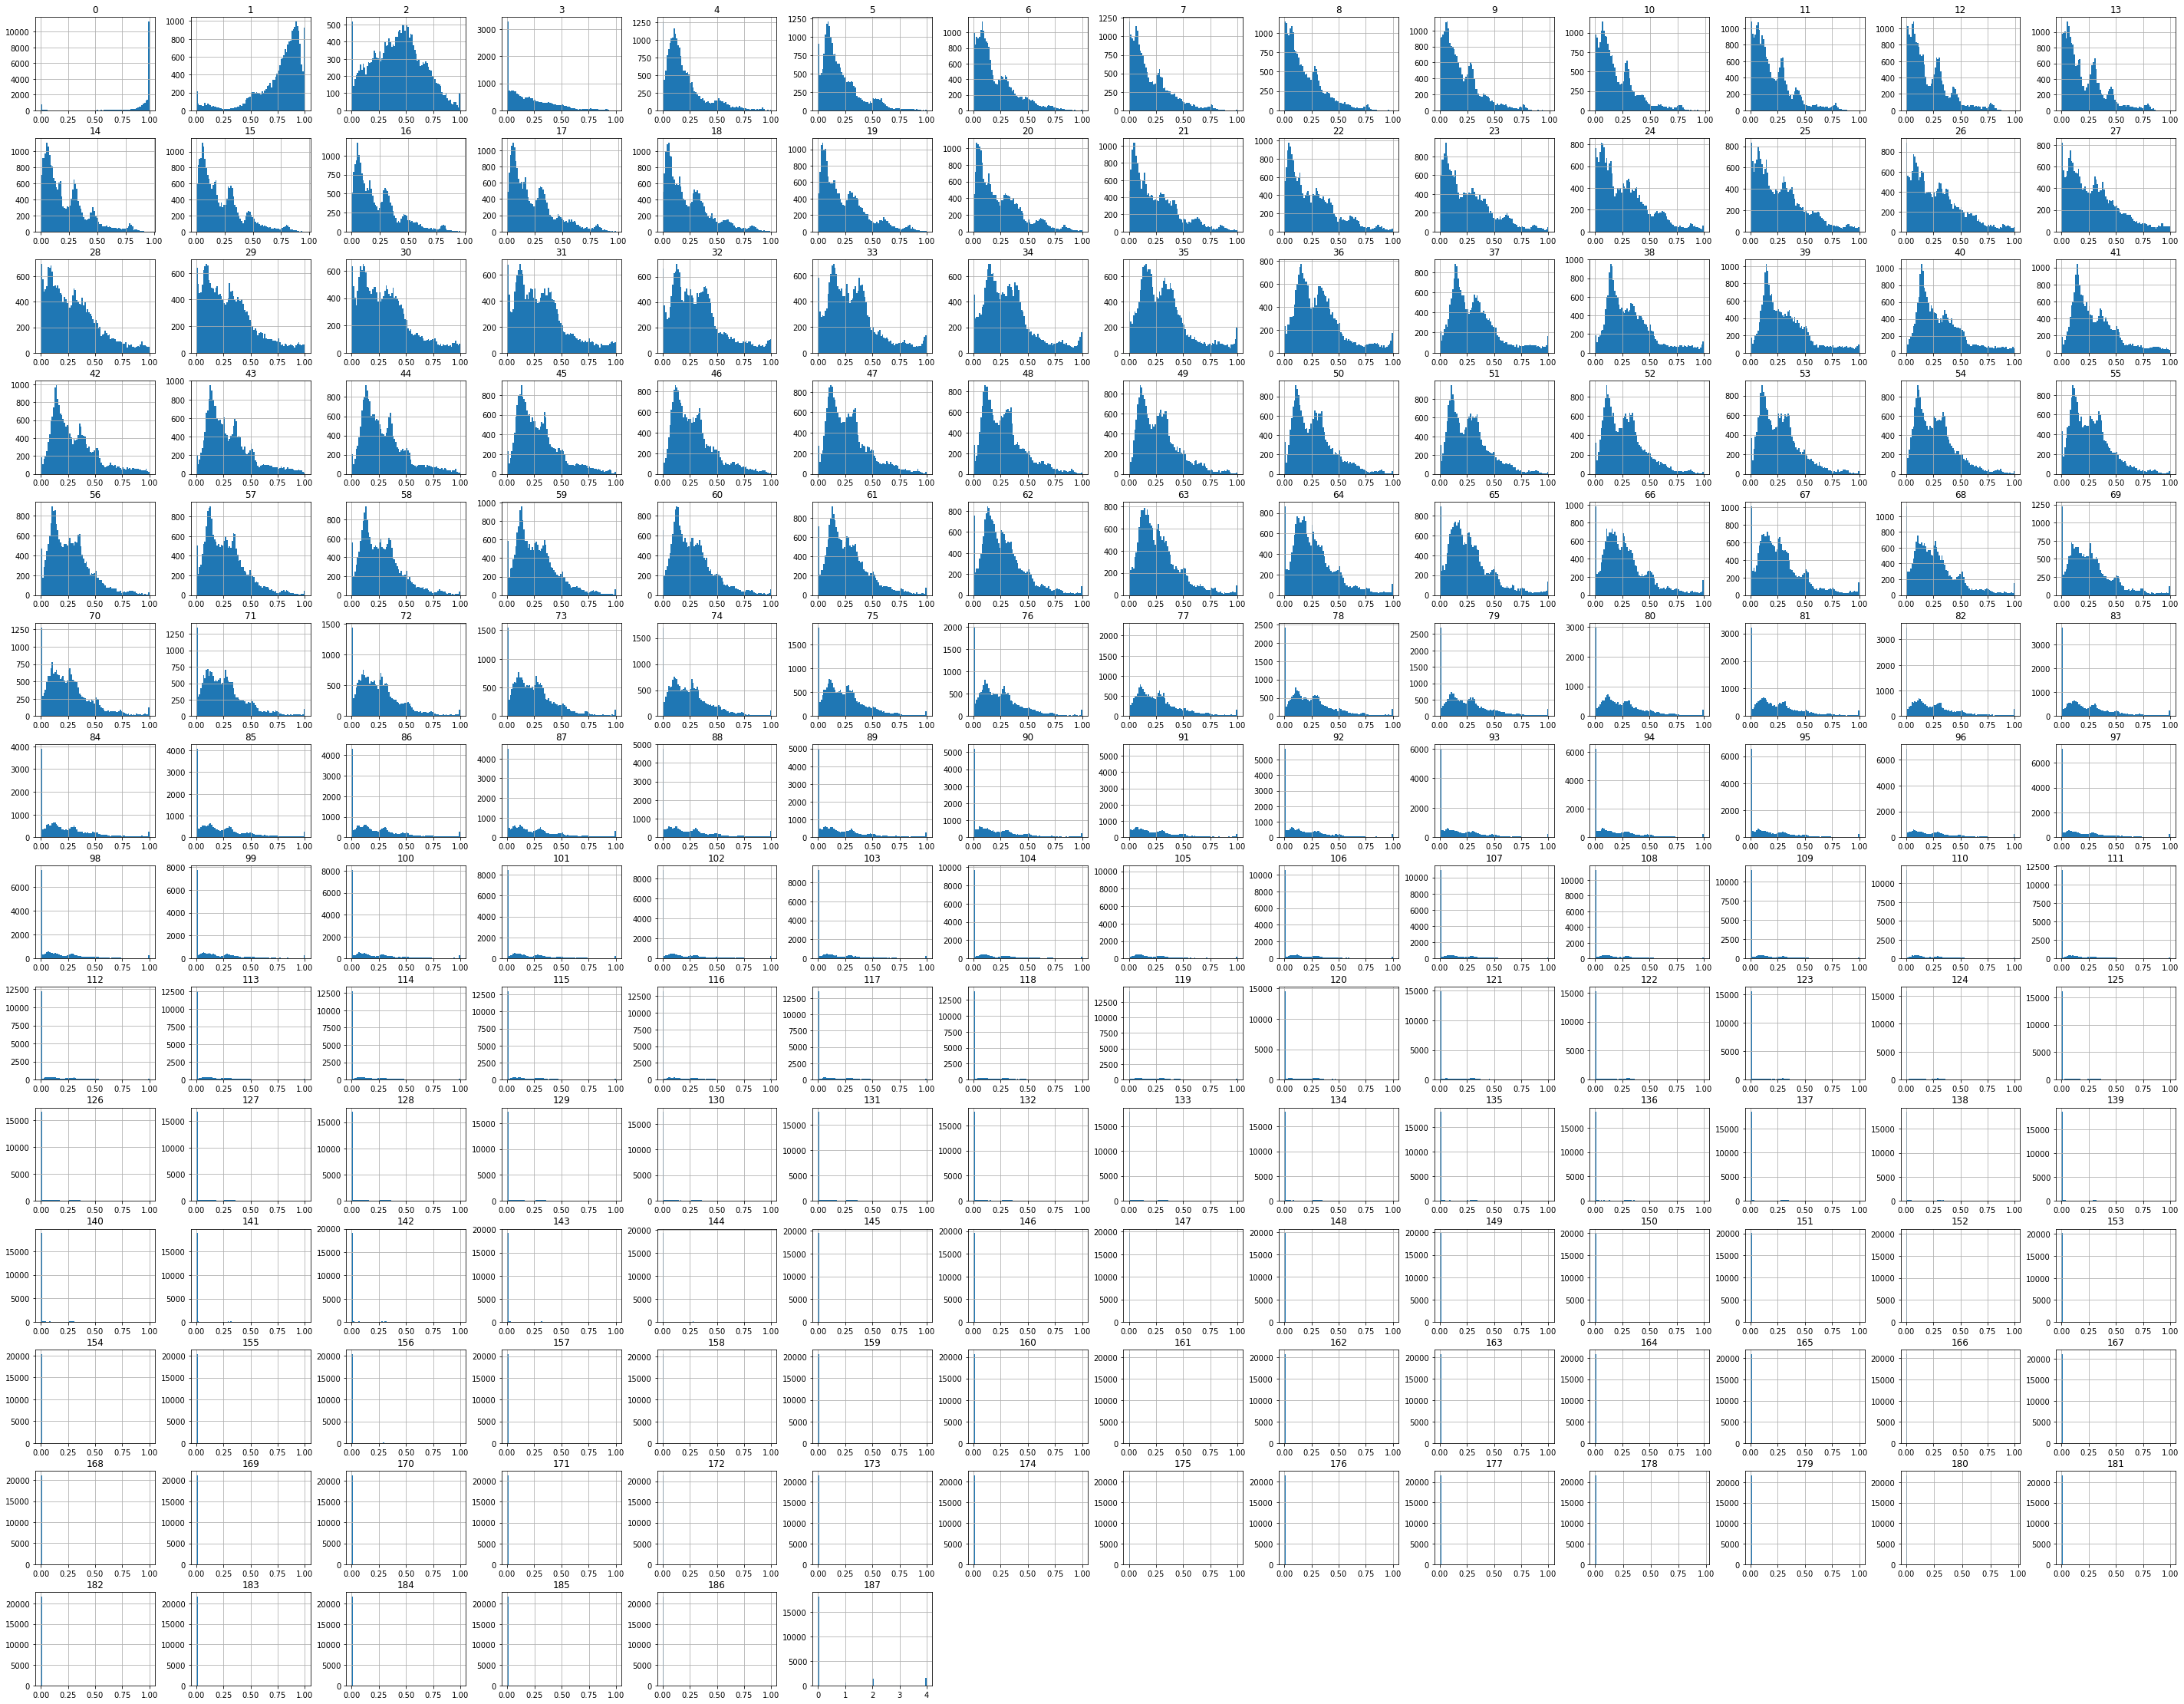

In [8]:
mit_test_data.hist(bins = 80,figsize =(50,40))

In [9]:
print(mit_train_data.shape)
print(mit_test_data.shape)

(87554, 188)
(21892, 188)


In [10]:
mit_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x_train, y_train = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]

In [12]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [13]:
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]

In [14]:
mit_test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [15]:
y_train = to_categorical(y_train)
testy = to_categorical(testy)

In [16]:
print("X shape=" +str(x_train.shape))
print("y shape=" +str(y_train.shape))

print("testX shape=" +str(testX.shape))
print("testy shape=" +str(testy.shape))

X shape=(87554, 187)
y shape=(87554, 5)
testX shape=(21892, 187)
testy shape=(21892, 5)


# DNN Model

In [17]:
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(187,)))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))

In [18]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
ann_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12032     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1

In [21]:
history = ann_model.fit(x_train, y_train,batch_size=128,
epochs=200,
verbose=1,
validation_data = (testX, testy),
callbacks = [learning_rate_reduction,es])

Epoch 1/200
685/685 [==============================] - 4s 4ms/step - loss: 0.3953 - accuracy: 0.8914 - val_loss: 0.2245 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 2/200
685/685 [==============================] - 3s 5ms/step - loss: 0.2299 - accuracy: 0.9347 - val_loss: 0.1632 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 3/200
685/685 [==============================] - 2s 3ms/step - loss: 0.1908 - accuracy: 0.9480 - val_loss: 0.1440 - val_accuracy: 0.9597 - lr: 0.0010
Epoch 4/200
685/685 [==============================] - 2s 3ms/step - loss: 0.1706 - accuracy: 0.9526 - val_loss: 0.1387 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 5/200
685/685 [==============================] - 2s 3ms/step - loss: 0.1600 - accuracy: 0.9558 - val_loss: 0.1297 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 6/200
685/685 [==============================] - 2s 4ms/step - loss: 0.1493 - accuracy: 0.9589 - val_loss: 0.1230 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 7/200
685/685 [==============================] - 2s 3ms/st

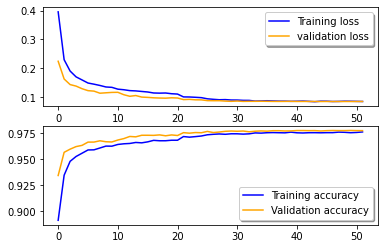

In [22]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Conv1D Model

In [23]:
model = Sequential()

model.add(Convolution1D(filters=32, kernel_size=5, strides=1 , input_shape=(187,1)))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 183, 32)           192       
                                                                 
 conv1d_1 (Conv1D)           (None, 183, 32)           5152      
                                                                 
 conv1d_2 (Conv1D)           (None, 183, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 32)           0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 90, 32)            5152      
                                                                 
 conv1d_4 (Conv1D)           (None, 90, 32)            5152      
                                                      

In [25]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(ann_model, to_file='DNN.CSV', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [35]:
history = model.fit(x_train, y_train,batch_size=128,
epochs=200,
verbose=1,
validation_data = (testX, testy),
callbacks = [learning_rate_reduction,es])

Epoch 1/200
685/685 [==============================] - 66s 91ms/step - loss: 0.3369 - accuracy: 0.9128 - val_loss: 0.8456 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 2/200
685/685 [==============================] - 78s 113ms/step - loss: 0.1842 - accuracy: 0.9520 - val_loss: 1.2706 - val_accuracy: 0.7122 - lr: 0.0010
Epoch 3/200
685/685 [==============================] - 105s 153ms/step - loss: 0.1344 - accuracy: 0.9640 - val_loss: 0.1318 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 4/200
685/685 [==============================] - 54s 79ms/step - loss: 0.1047 - accuracy: 0.9714 - val_loss: 0.3024 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 5/200
685/685 [==============================] - 53s 78ms/step - loss: 0.1570 - accuracy: 0.9582 - val_loss: 0.4309 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 6/200
684/685 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9567
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
685/685 [=========================

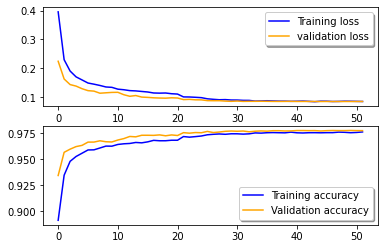

In [28]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)